# LAB-2: Exploratory Data Analysis (EDA) Lab Report – UPC Campus Nord data

### Team members: Saúl Castañeda, Yi-Tsen Kao, Peiru Liang

**Exploratory Data Analysis (EDA)** is the process of **analyzing and investigating datasets** to summarize their main characteristics through **statistical graphics** and **data visualization techniques**.


It is a critical first step in any data science project to:

- Understand the structure and content of the data
- Identify patterns, trends, and relationships
- Spot anomalies or data quality issues
- Prepare the data for further modeling or hypothesis testing


<mark>**EDA is not just about numbers, it’s about telling the story behind the data.**</mark>


---

The following images provides a complete steps of EDA. Not all of them have to be conducted.

<img src="eda.jpg" alt="EDA steps" width="800">


---


### Objective of this Lab

Conduct an Exploratory Data Analysis on the dataset   `Campus_DiagonalNordUPC_data.xlsx`, which contains information about the **consumption of electricity, water resources, etc** of the **UPC Diagonal Nord Campus**.


The **goal** is to:
- Extract insights from the data
- Identify patterns or anomalies
- Visualize findings in a clear, meaningful way

You are free to choose your **visualization style** and the **story you want to tell** through your analysis.


*Tip:* Use this Jupyter Notebook to document your process. Combine **text (Markdown)**, **code**, and **visualizations** to build a clear and insightful narrative.

---


### Suggested Steps

1) Data Loading and Initial Exploration

- Load the dataset and display its structure (columns, data types, missing values, etc.)


2. Data Cleaning
- Handle missing, inconsistent, or incorrect data if necessary.
- Create new relevant variables or filters when useful


3. Exploratory Analysis

- Compute summary statistics and explore distributions. (week/weekends, monthly distributions, seasonal, etc).
- Look for correlations or relationships between variables.
- Detect and analyze anomalies or outliers and discuss possible causes

4. Data Visualization
 - Use appropriate plots to represent your findings clearly and effectively:

        - Line plots for time series
        - Bar charts for comparisons
        - Heatmaps for correlations
        - Boxplots for distributions

5. Insights and Conclusions
- Summarize your key findings
- Reflect on the main takeaways from your analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# ---------------------------------------------------------
# --- Muted color palette centered on #75896b ---
palette = {
    "primary": "#75896b",
    "blue":    "#6b7d91",
    "red":     "#a06b6b",
    "purple":  "#8a6b91",
    "amber":   "#b09b6b"
}

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Georgia", "DejaVu Serif", "Garamond"],
    "font.size": 12,
    "axes.titlesize": 15,
    "axes.labelsize": 12,
    "axes.edgecolor": "#3f4739",
    "axes.labelcolor": "#3f4739",
    "xtick.color": "#3f4739",
    "ytick.color": "#3f4739",
    "text.color": "#3f4739",
    "axes.titlepad": 10,
    "grid.color": "#c8d1bd",
    "grid.alpha": 0.6,
    "grid.linestyle": "--",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})
from IPython.display import display
# 1. read the dataset
data = pd.read_excel('Campus_DiagonalNordUPC_data.xlsx')

In [2]:
# 1.1.1 structure, columns
data.shape

(9793, 6)

In [3]:
# 1.1.2 structure, data types
data.dtypes

Date                                datetime64[ns]
Hour                                datetime64[ns]
Electricity Campus DN [kWh]                  int64
Water consumption Campus DN [m3]           float64
Temperature exterior [Celsius]             float64
Gas [kwh]                                  float64
dtype: object

In [4]:
# 1.1.3 structure, describe
data.describe()

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
count,9793,9793,9793.000000,9793.000000,9793.000000,9793.000000
mean,2025-03-24 03:46:26.480139008,2025-03-24 03:46:26.480139008,1039.818952,2.711848,17.350985,7.948224
min,2024-09-01 00:00:00,2024-09-01 00:00:00,0.000000,0.277742,1.000000,0.000000
25%,2024-12-11 23:00:00,2024-12-11 23:00:00,738.000000,1.103867,12.100000,0.000000
50%,2025-03-23 23:00:00,2025-03-23 23:00:00,853.000000,1.949100,17.000000,0.000000
75%,2025-07-04 00:00:00,2025-07-04 00:00:00,1338.000000,3.913985,22.200000,0.000000
max,2025-10-15 23:00:00,2025-10-15 23:00:00,2875.000000,18.637224,37.000000,197.353000
std,NaN,NaN,377.519473,2.054874,6.862379,22.615322


In [5]:
# 1.1.4 structure, missing values
data.isna().sum()

Date                                0
Hour                                0
Electricity Campus DN [kWh]         0
Water consumption Campus DN [m3]    0
Temperature exterior [Celsius]      0
Gas [kwh]                           0
dtype: int64

In [6]:
# 2.1 handle missing, inconsistent, or incorrect data if necessary.


In [7]:
# 2.2 create new relevant variables or filters when useful
'''
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Hour'].dt.hour
data['weekday'] = data['Date'].dt.day_name()  # weekdays
data['is_weekend'] = data['Date'].dt.dayofweek >= 5  # True = weekends
data['season'] = data['Date'].dt.quarter  # season 1-4

# def seasons function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# apply season
data['season'] = data['month'].apply(get_season)
data
'''
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.day_name()  # weekdays
data['is_weekend'] = data['Date'].dt.dayofweek >= 5  # True = weekends
data['season'] = data['Date'].dt.quarter  # season 1-4
data['hour'] = data['Hour'].dt.hour

# def seasons function
def get_season(row):
    year = row['year']
    month = row['month']

    if month in [12, 1, 2]:
        # 冬季跨年归属年份
        if year == 2024:
            return '2024-Winter'
        else:
            return '2025-Winter'
    elif month in [3, 4, 5]:
        return f"{year}-Spring"
    elif month in [6, 7, 8]:
        return f"{year}-Summer"
    elif month in [9, 10, 11]:
        return f"{year}-Autumn"

# 应用到 DataFrame，每行处理
data['season'] = data.apply(get_season, axis=1)

# Force proper types
date_col = pd.to_datetime(data["Date"], dayfirst=True, errors="raise")        # full date
hour_col = pd.to_datetime(data["Hour"], errors="raise")                       # full datetime, we only want the time

# Build a true hourly timestamp: (date at midnight) + (hour:minute:second)
datetime_idx = date_col.dt.normalize() + (
    pd.to_timedelta(hour_col.dt.hour,   unit="h")
  + pd.to_timedelta(hour_col.dt.minute, unit="m")
  + pd.to_timedelta(hour_col.dt.second, unit="s")
)

# Set index and drop originals
data = (data
        .assign(datetime=datetime_idx)
        .set_index("datetime")
        .drop(columns=["Date", "Hour"])
        .sort_index())

# Neat preview in Jupyter
with pd.option_context("display.max_rows", 20, "display.max_columns", None, "display.width", None):
    display(data.head(20))
print(f"{len(data):,} rows × {data.shape[1]} columns")

# Sanity check: do we really have 24 rows per day?
counts = data.groupby(data.index.date).size()
print("Distinct counts per day:", counts.unique()[:10])

,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],year,month,day,weekday,is_weekend,season,hour
datetime,,,,,,,,,,,
2024-09-01 00:00:00,741,0.797139,22.7,0.0,2024,9,1,Sunday,True,2024-Autumn,0
2024-09-01 01:00:00,734,0.793457,22.5,0.0,2024,9,1,Sunday,True,2024-Autumn,1
2024-09-01 02:00:00,735,0.768367,22.4,0.0,2024,9,1,Sunday,True,2024-Autumn,2
2024-09-01 03:00:00,732,0.767533,22.1,0.0,2024,9,1,Sunday,True,2024-Autumn,3
2024-09-01 04:00:00,729,0.784900,21.4,0.0,2024,9,1,Sunday,True,2024-Autumn,4
2024-09-01 05:00:00,733,0.770383,21.3,0.0,2024,9,1,Sunday,True,2024-Autumn,5
2024-09-01 06:00:00,753,0.912133,20.4,0.0,2024,9,1,Sunday,True,2024-Autumn,6
2024-09-01 07:00:00,744,1.848367,19.9,0.0,2024,9,1,Sunday,True,2024-Autumn,7
2024-09-01 08:00:00,694,2.261700,24.1,0.0,2024,9,1,Sunday,True,2024-Autumn,8


9,793 rows × 11 columns
Distinct counts per day: [24 25 23  1]


In [8]:
#display(data.tail(20))
print(f"{len(data):,} rows × {data.shape[1]} columns")

# Sanity check: do we really have 24 rows per day?
counts = data.groupby(data.index.date).size()
print("Distinct counts per day:", counts.unique()[:10])

9,793 rows × 11 columns
Distinct counts per day: [24 25 23  1]


In [9]:
def get_measurement_columns(df):
    return [c for c in df.select_dtypes("number").columns
            if c not in ["year", "month", "day", "hour"]]

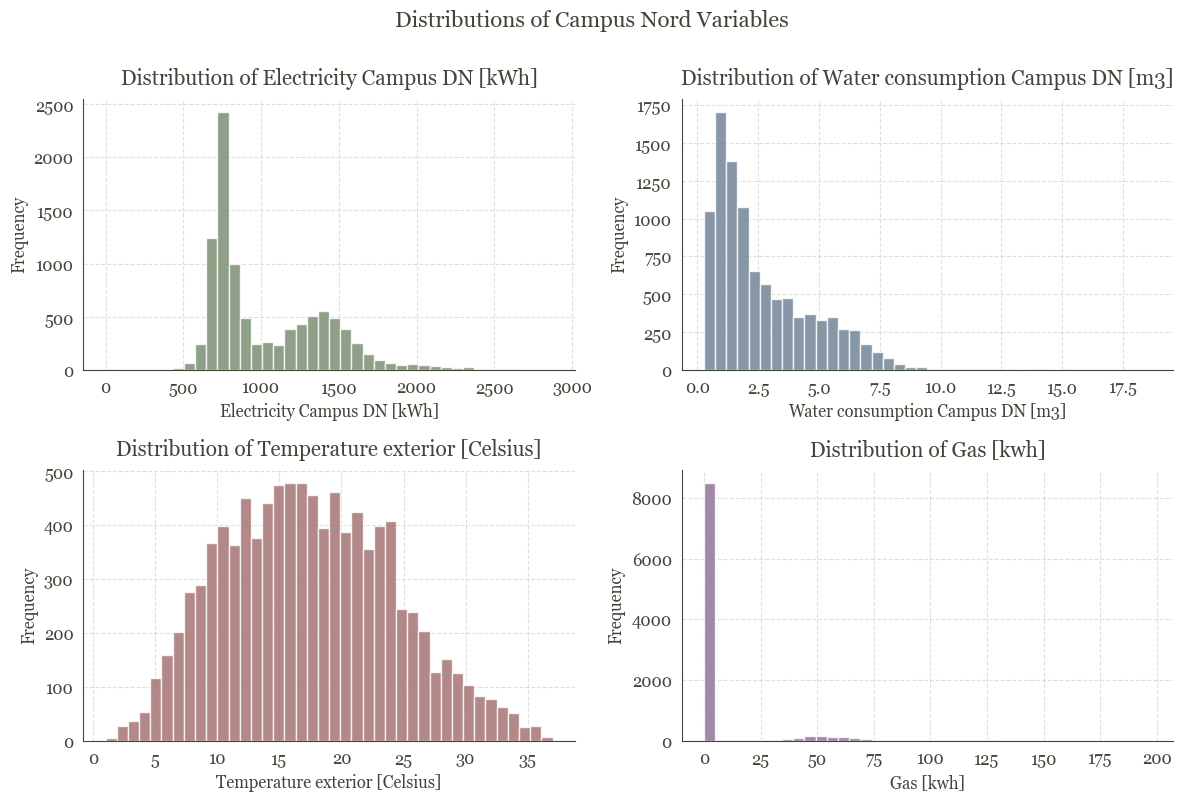

In [10]:
# 3.1 Compute summary statistics and explore distributions.
numeric_cols = get_measurement_columns(data)
colors = list(palette.values())

# Define grid layout
ncols = 2  # two plots per row (adjust if you like)
nrows = int(np.ceil(len(numeric_cols) / ncols))

# Create figure with more height to accommodate titles
fig = plt.figure(figsize=(12, 4 * nrows))
# Add space between subplots
plt.subplots_adjust(hspace=0.4)

# Create subplot grid
axes = []
for i in range(nrows * ncols):
    if i < len(numeric_cols):
        ax = plt.subplot(nrows, ncols, i+1)
        axes.append(ax)

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    color = colors[i % len(colors)]
    ax.hist(data[col].dropna(), bins=40, color=color, alpha=0.8, edgecolor="white")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Add main title with more space from subplots
fig.suptitle("Distributions of Campus Nord Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

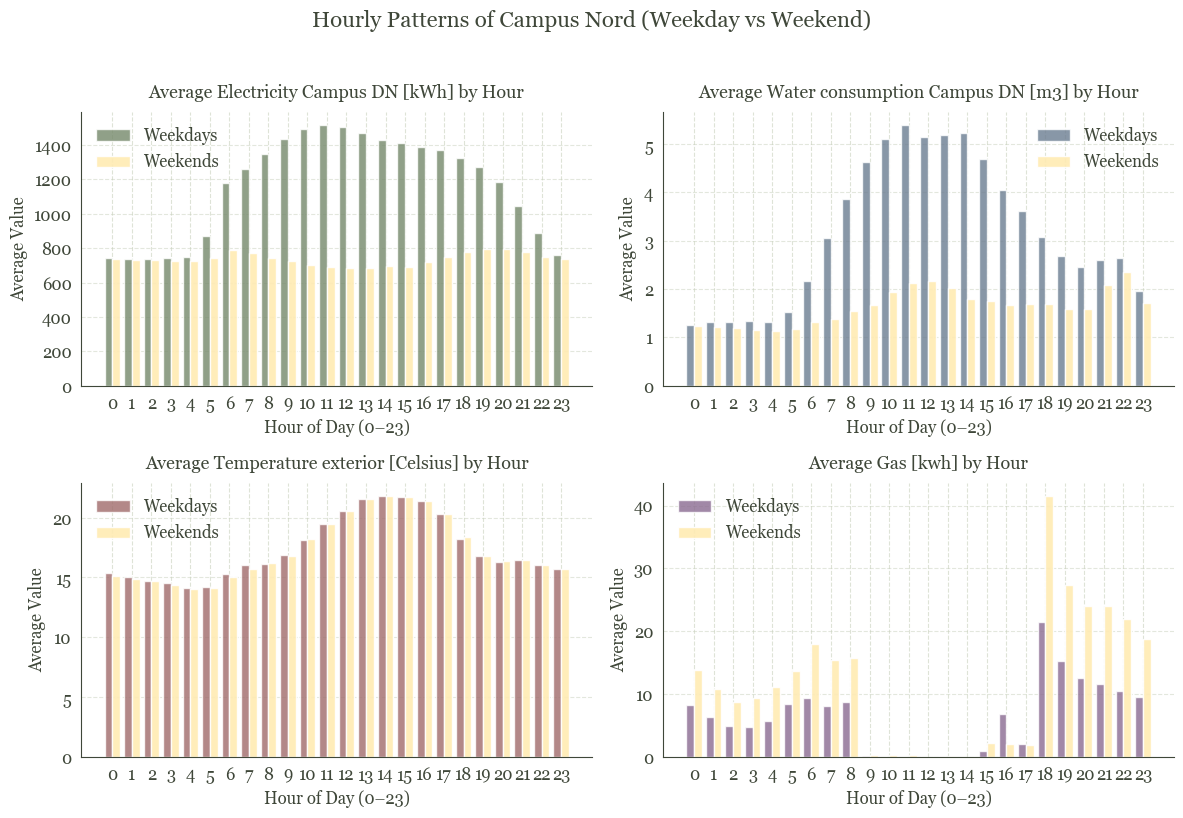

In [11]:
# 3.1.1 Weekdays & Weekends
weekday_data = data[data['is_weekend'] == False]
weekend_data = data[data['is_weekend'] == True]

ncols = 2
nrows = int(np.ceil(len(numeric_cols) / ncols))

fig = plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axes = []
for i in range(nrows * ncols):
    if i < len(numeric_cols):
        ax = plt.subplot(nrows, ncols, i + 1)
        axes.append(ax)

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    color = colors[i % len(colors)]

    weekday_hourly = weekday_data.groupby('hour')[col].mean()
    weekend_hourly = weekend_data.groupby('hour')[col].mean()

    width = 0.4
    x = np.arange(24)

    ax.bar(x - width/2, weekday_hourly.values, width=width,
           color=color, alpha=0.8, label='Weekdays')
    ax.bar(x + width/2, weekend_hourly.values, width=width,
           color="#ffebb3", alpha=0.9, label='Weekends')

    ax.set_title(f'Average {col} by Hour', fontsize=13, pad=10)
    ax.set_xlabel("Hour of Day (0–23)")
    ax.set_ylabel("Average Value")
    ax.set_xticks(range(0, 24))
    ax.legend(frameon=False)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

fig.suptitle("Hourly Patterns of Campus Nord (Weekday vs Weekend)",
             fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

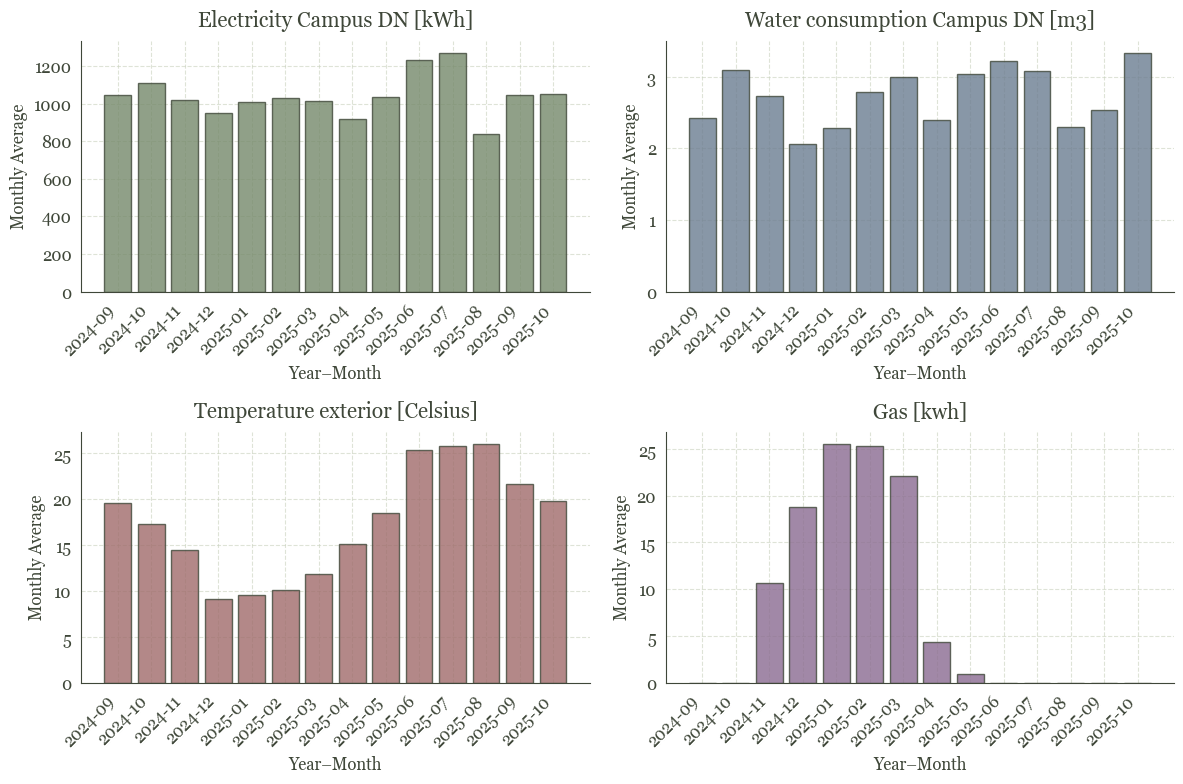

In [12]:
# 3.1.2 monthly distributions
# Real measurement columns only
numeric_cols = get_measurement_columns(data)
colors = list(palette.values())

# Monthly means on a continuous monthly index
# Use 'MS' (month start) or 'M' (month end) — either is fine; pick one and stay consistent
monthly_means = data[numeric_cols].resample("MS").mean()

# Build string labels like '2024-09', '2024-10', ... '2025-10'
ym_labels = monthly_means.index.to_period('M').astype(str)
x = np.arange(len(ym_labels))  # 0..13 for 14 months

# Grid layout
ncols = 2
nrows = int(np.ceil(len(numeric_cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    color = colors[i % len(colors)]
    ax.bar(x, monthly_means[col].values, color=color, edgecolor="#3f4739", alpha=0.8)
    ax.set_title(col)
    ax.set_xlabel("Year–Month")
    ax.set_ylabel("Monthly Average")
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Ticks: show readable year–month labels
    ax.set_xticks(x)
    ax.set_xticklabels(ym_labels, rotation=45, ha='right')
    # Optional: if too crowded, show every 2nd label
    # ax.set_xticks(x[::2]); ax.set_xticklabels(ym_labels[::2], rotation=45, ha='right')

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

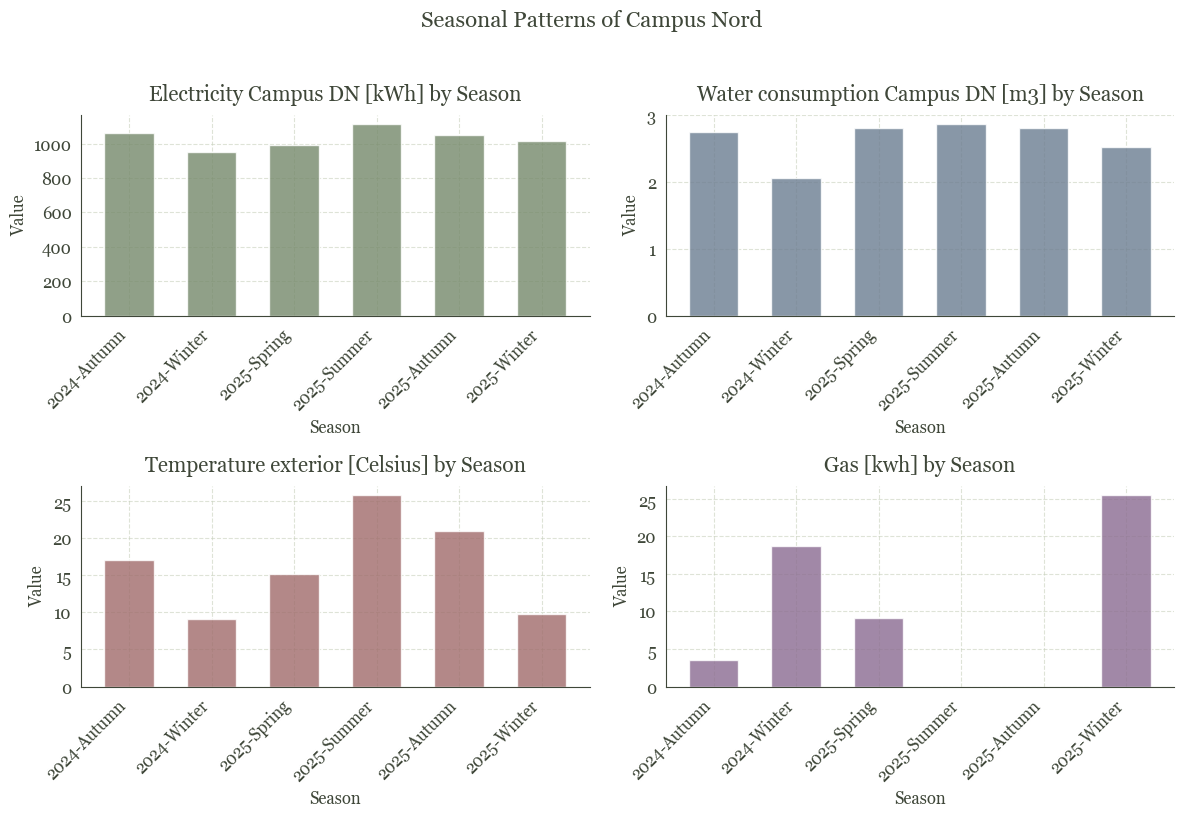

In [13]:
# 3.1.3 seasonal
numeric_cols = ['Electricity Campus DN [kWh]',
                'Water consumption Campus DN [m3]',
                'Temperature exterior [Celsius]',
                'Gas [kwh]']

colors = list(palette.values())
# seq
season_order = [ 'Spring', 'Summer', 'Autumn', 'Winter']

# list
data['season'] = pd.Categorical(
    data['season'],
    categories=sorted(data['season'].unique(), key=lambda x: (int(x.split('-')[0]), season_order.index(x.split('-')[1]))),
    ordered=True
)
ncols = 2
nrows = int(np.ceil(len(numeric_cols) / ncols))

# canva
fig = plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# sub
axes = []
for i in range(nrows * ncols):
    if i < len(numeric_cols):
        ax = plt.subplot(nrows, ncols, i + 1)
        axes.append(ax)

# loop
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    color = colors[i % len(colors)]

    # avg season
    y = data.groupby('season', observed=True)[col].mean()
    x = np.arange(len(y))

    ax.bar(x, y.values, color=color, alpha=0.8, width=0.6)

    ax.set_title(f"{col} by Season")
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.set_xticks(x)
    ax.set_xticklabels(y.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

fig.suptitle("Seasonal Patterns of Campus Nord", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

In [14]:
# 3.2 Look for correlations or relationships between variables.


In [15]:
# Calculation of correlation coefficients
corr = data.iloc[:,0:7].corr(method='pearson')  # method{‘pearson’, ‘kendall’, ‘spearman’}
corr.style.background_gradient(cmap='coolwarm')

,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],year,month,day
Electricity Campus DN [kWh],1.000000,0.681761,0.274703,-0.110605,0.013278,0.003835,-0.005579
Water consumption Campus DN [m3],0.681761,1.000000,0.234934,-0.146711,0.042082,-0.016659,-0.021877
Temperature exterior [Celsius],0.274703,0.234934,1.000000,-0.406585,0.217073,0.228212,-0.020104
Gas [kwh],-0.110605,-0.146711,-0.406585,1.000000,0.016622,-0.215885,-0.035514
year,0.013278,0.042082,0.217073,0.016622,1.000000,-0.712388,-0.022518
month,0.003835,-0.016659,0.228212,-0.215885,-0.712388,1.000000,-0.017822
day,-0.005579,-0.021877,-0.020104,-0.035514,-0.022518,-0.017822,1.000000


In [16]:
# 3.3 Detect and analyze anomalies or outliers and discuss possible causes
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.015, random_state=42)
data['anomaly'] = clf.fit_predict(data[['Water consumption Campus DN [m3]', 'Gas [kwh]', 'Temperature exterior [Celsius]','is_weekend']])
anomalies = data[data['anomaly'] == -1]
data.to_csv("anomaly_investigation.csv")
print(anomalies.head(10))

                     Electricity Campus DN [kWh]  \
datetime                                           
2024-11-22 18:00:00                         1348   
2024-11-23 18:00:00                          795   
2024-11-24 18:00:00                          773   
2024-11-25 18:00:00                         1378   
2024-11-26 18:00:00                         1383   
2024-11-29 18:00:00                         1268   
2024-11-30 08:00:00                          805   
2024-12-06 18:00:00                          827   
2024-12-07 18:00:00                          792   
2024-12-08 18:00:00                          732   

                     Water consumption Campus DN [m3]  \
datetime                                                
2024-11-22 18:00:00                          3.539336   
2024-11-23 18:00:00                          1.628820   
2024-11-24 18:00:00                          1.876643   
2024-11-25 18:00:00                          3.286518   
2024-11-26 18:00:00              

In [17]:
num_anomaly_col = (data['anomaly']).sum()
num_anomalies = (data['anomaly']==-1).sum()
print("Number of anomaly column:", num_anomaly_col)
print("Number of anomalies:", num_anomalies)
print(data.index[:3])
print(data.index[-3:])


Number of anomaly column: 9499
Number of anomalies: 147
DatetimeIndex(['2024-09-01 00:00:00', '2024-09-01 01:00:00',
               '2024-09-01 02:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
DatetimeIndex(['2025-10-15 21:00:00', '2025-10-15 22:00:00',
               '2025-10-15 23:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


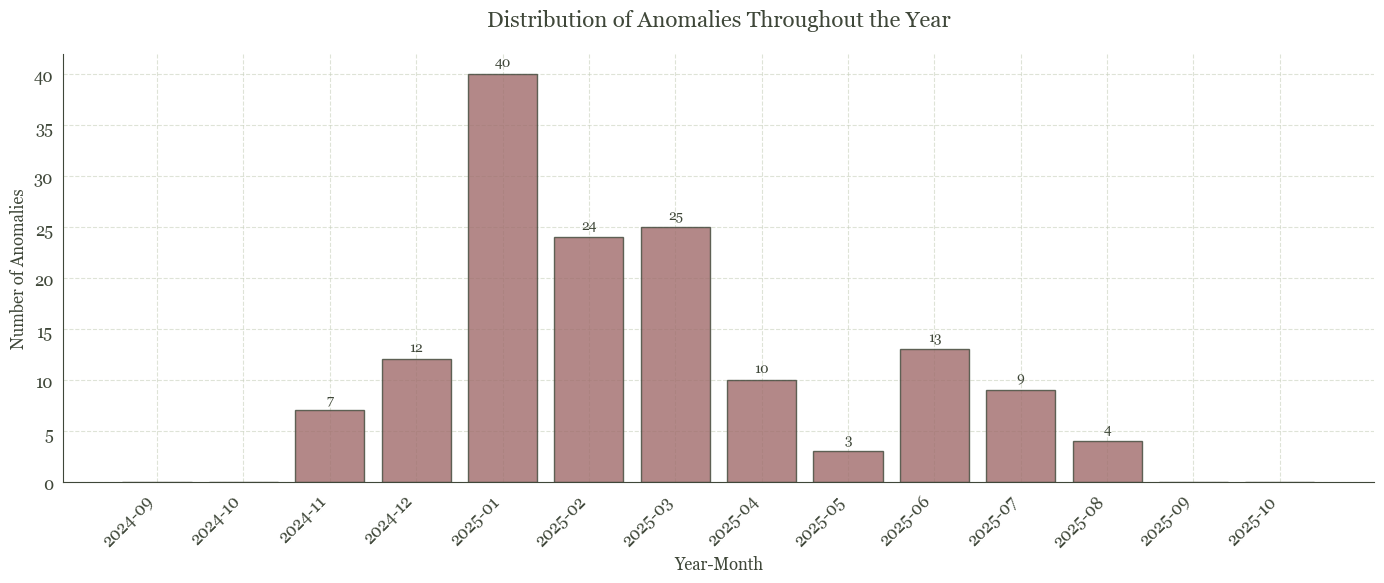


Total anomalies detected: 147
Anomalies per month:
datetime
2024-11     7
2024-12    12
2025-01    40
2025-02    24
2025-03    25
2025-04    10
2025-05     3
2025-06    13
2025-07     9
2025-08     4
Freq: M, dtype: int64

Month with most anomalies: 2025-01 (40 anomalies)
Month(s) with NO anomalies: 4 months

Months with NO anomalies (4 months):
  - 2024-09
  - 2024-10
  - 2025-09
  - 2025-10


In [18]:
# Histogram of anomalies distribution throughout the year
# Filter data where anomaly == -1
anomalies = data[data['anomaly'] == -1].copy()

# Extract year-month for grouping
anomalies['year_month'] = anomalies.index.to_period('M')

# Count anomalies per month
anomaly_counts = anomalies.groupby('year_month').size()

# Get all months in the dataset
all_months = pd.Series(data.index.to_period('M').unique()).sort_values()

# Create a complete series with all months (including those with 0 anomalies)
complete_counts = pd.Series(0, index=all_months)
complete_counts.update(anomaly_counts)

# Find months with no anomalies
months_with_no_anomalies = complete_counts[complete_counts == 0].index.tolist()

# Create the histogram
plt.figure(figsize=(14, 6))
x = np.arange(len(complete_counts))
plt.bar(x, complete_counts.values, color=palette['red'], alpha=0.8, edgecolor="#3f4739")

plt.title('Distribution of Anomalies Throughout the Year', fontsize=16, pad=20)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Anomalies', fontsize=12)
plt.xticks(x, complete_counts.index.astype(str), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of bars
for i, v in enumerate(complete_counts.values):
    if v > 0:  # Only show labels for non-zero values
        plt.text(i, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal anomalies detected: {len(anomalies)}")
print(f"Anomalies per month:\n{complete_counts[complete_counts > 0]}")
print(f"\nMonth with most anomalies: {complete_counts.idxmax()} ({int(complete_counts.max())} anomalies)")
if complete_counts.min() == 0:
    print(f"Month(s) with NO anomalies: {len(months_with_no_anomalies)} months")
else:
    print(f"Month with least anomalies: {complete_counts.idxmin()} ({int(complete_counts.min())} anomalies)")

# Print months with no anomalies
if months_with_no_anomalies:
    print(f"\nMonths with NO anomalies ({len(months_with_no_anomalies)} months):")
    for month in months_with_no_anomalies:
        print(f"  - {month}")
else:
    print("\nAll months have at least one anomaly.")

In [19]:
data = data.drop(columns=['anomaly'])  # remove anomaly column for further analysis

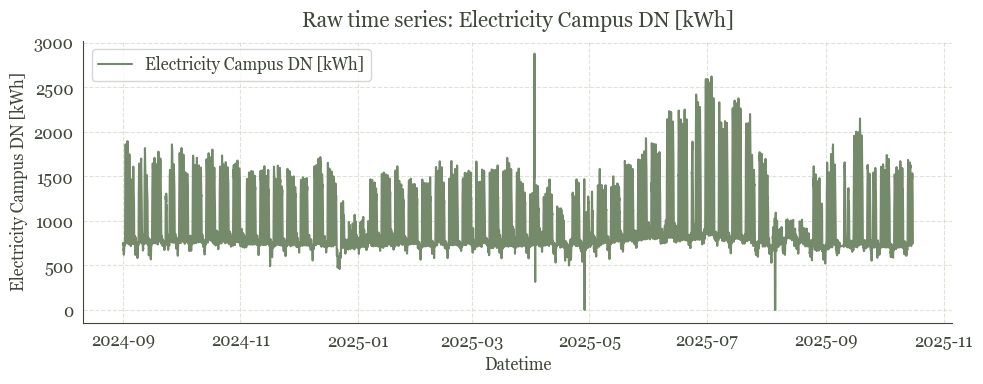

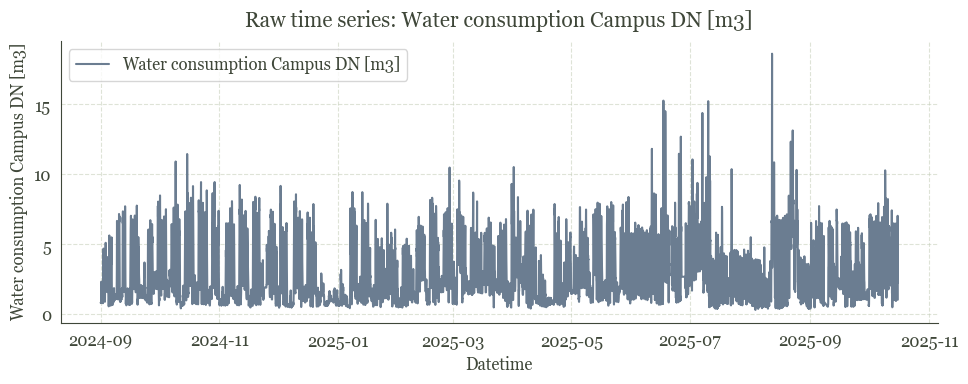

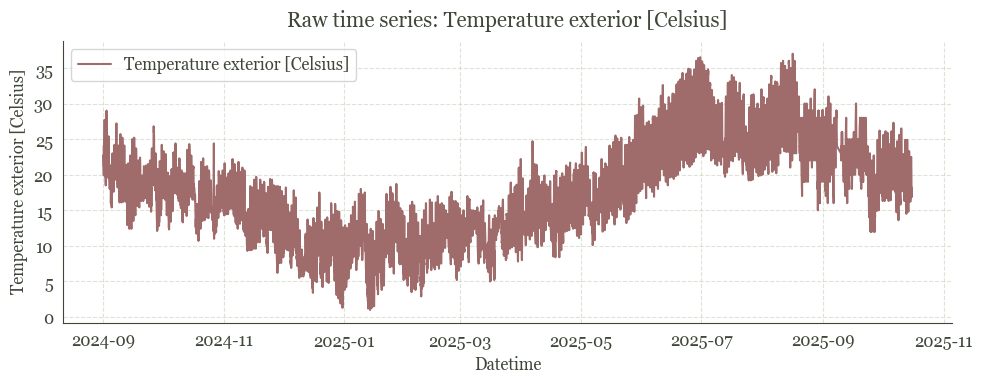

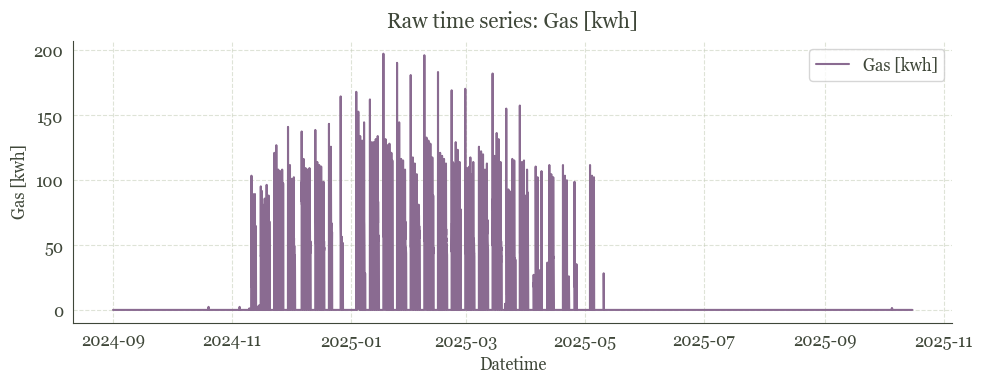

In [20]:
# 4.1 Line plots for time series
# Select numeric columns (just to be safe)
numeric_cols = numeric_cols = get_measurement_columns(data)

# Cycle through your palette
colors = list(palette.values())

for i, col in enumerate(numeric_cols):
    color = colors[i % len(colors)]
    plt.figure(figsize=(10, 4))
    plt.plot(data.index, data[col], color=color, label=col)
    plt.title(f"Raw time series: {col}")
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

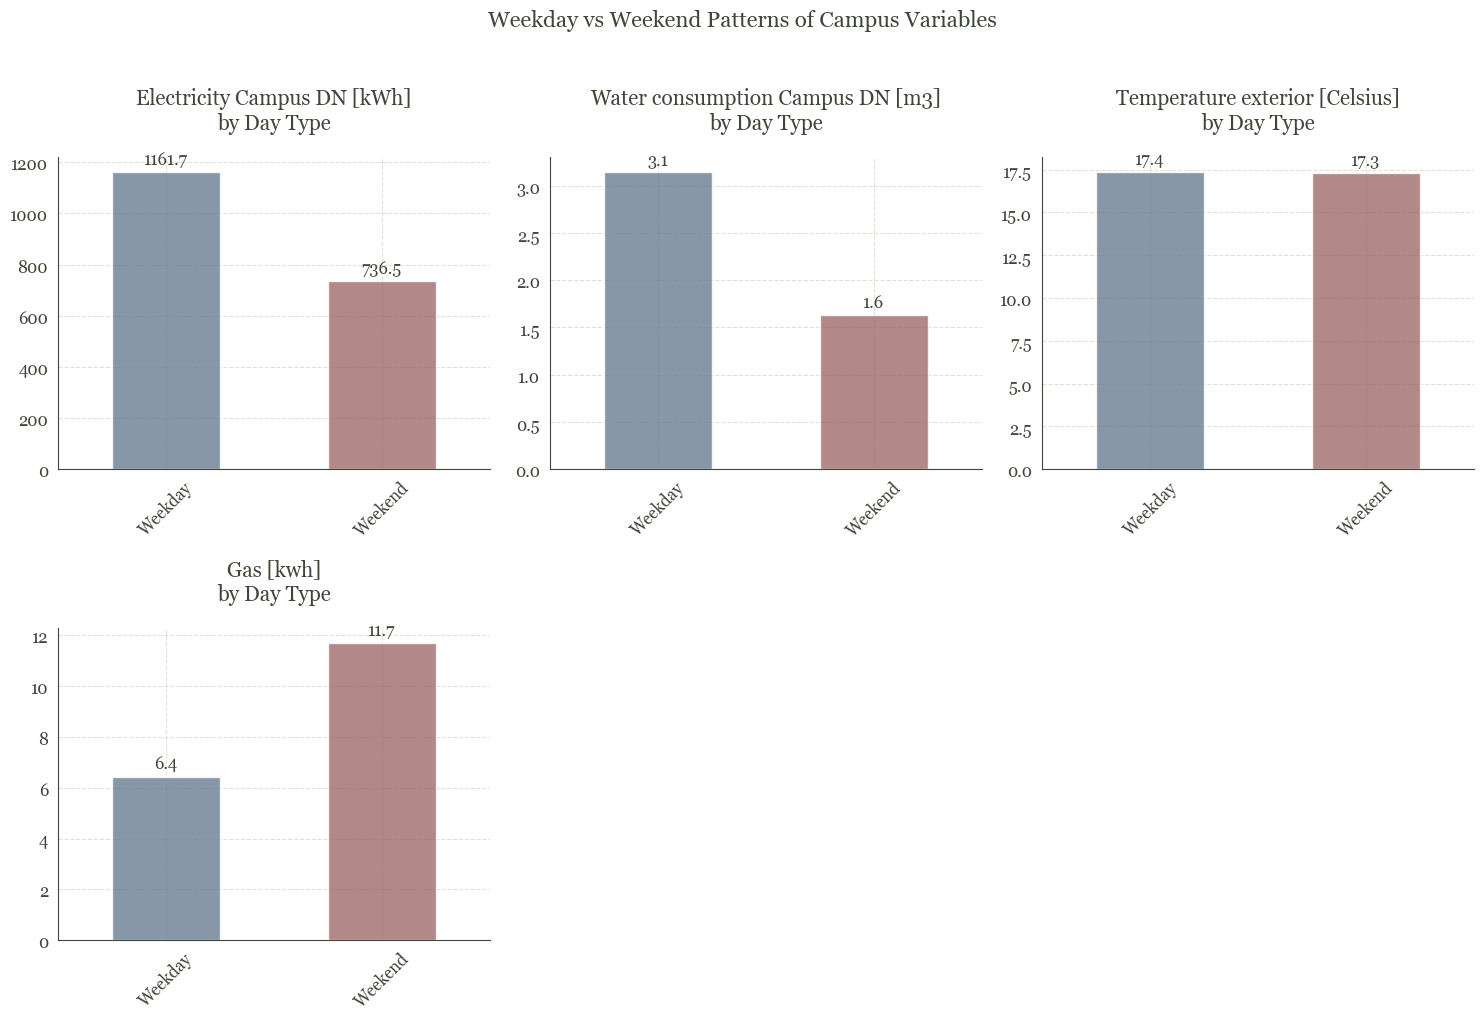

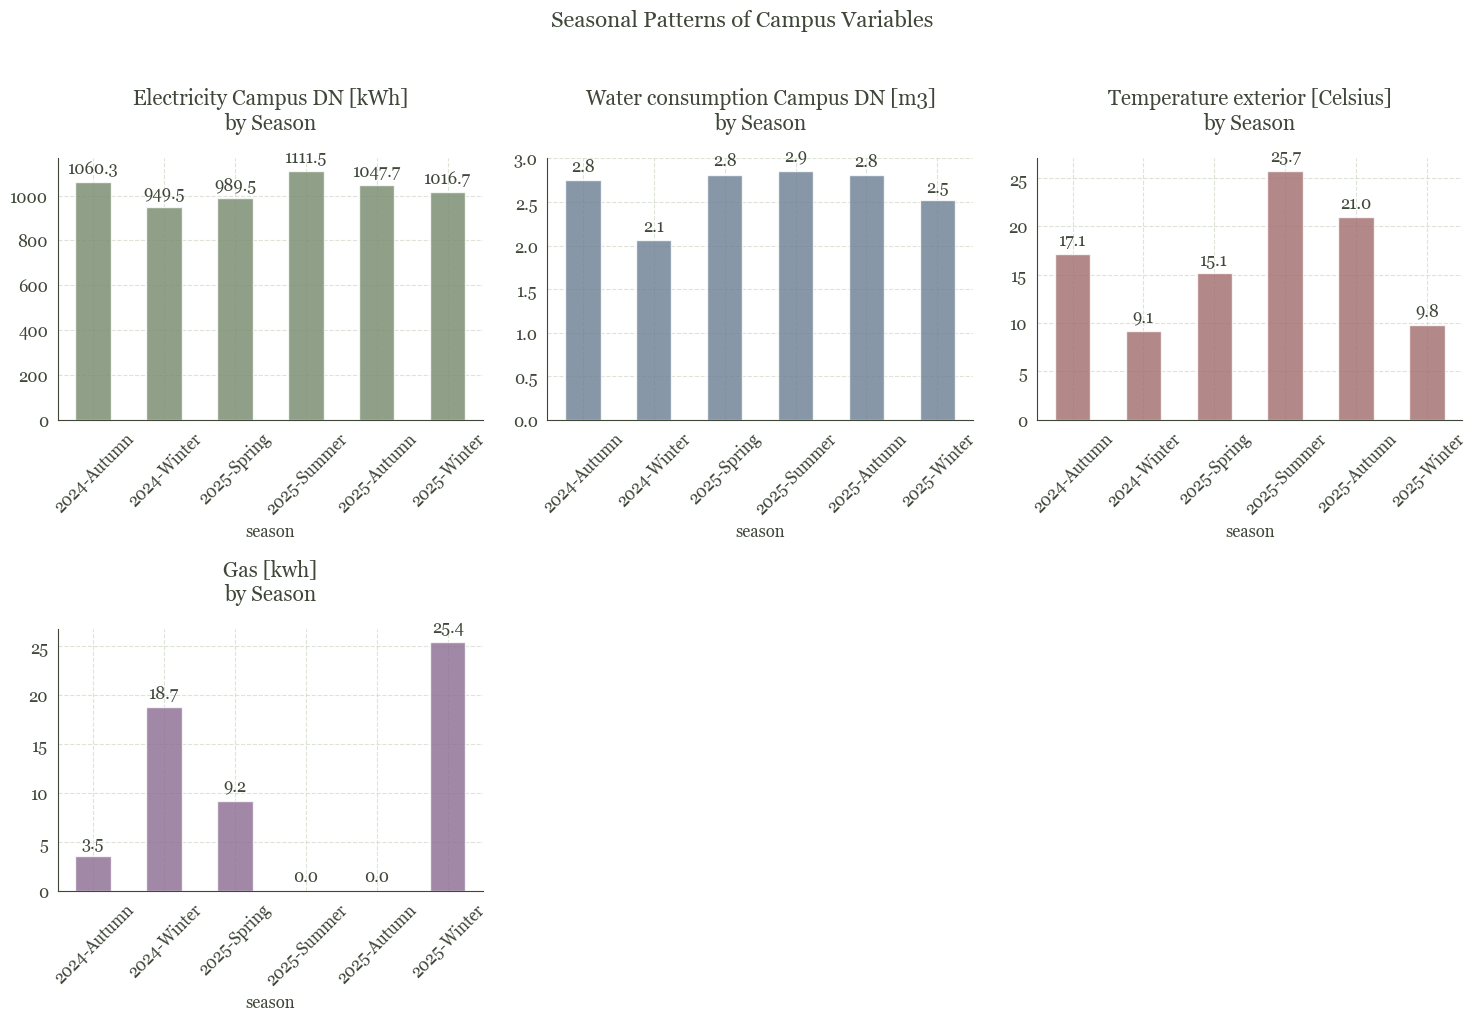

In [21]:
# 4.2 Bar charts for comparisons

# Get measurement columns
numeric_cols = get_measurement_columns(data)
colors = list(palette.values())

# 1. Weekday vs Weekend Patterns
plt.figure(figsize=(15, 10))
# Calculate means for weekdays and weekends
weekday_data = data[~data['is_weekend']][numeric_cols].mean()
weekend_data = data[data['is_weekend']][numeric_cols].mean()
day_type_means = pd.DataFrame({
    'Weekday': weekday_data,
    'Weekend': weekend_data
})

# Create subplots for each variable
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    bars = day_type_means.loc[col].plot(kind='bar', color=[palette['blue'], palette['red']], alpha=0.8)
    plt.title(f'{col}\nby Day Type', pad=20)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    # Add value labels on top of each bar
    plt.bar_label(bars.containers[0], fmt='%.1f', padding=3)

plt.suptitle('Weekday vs Weekend Patterns of Campus Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Seasonal Comparison
plt.figure(figsize=(15, 10))
seasonal_means = data.groupby('season', observed=True)[numeric_cols].mean()

# Create a more organized layout with better spacing
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    bars = seasonal_means[col].plot(kind='bar', color=colors[i % len(colors)], alpha=0.8)
    plt.title(f'{col}\nby Season', pad=20)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    # Add value labels on top of each bar
    for bar in bars.containers:
        plt.bar_label(bar, fmt='%.1f', padding=3)

plt.suptitle('Seasonal Patterns of Campus Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


In [22]:
data.columns

Index(['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]',
       'Temperature exterior [Celsius]', 'Gas [kwh]', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'season', 'hour'],
      dtype='object')

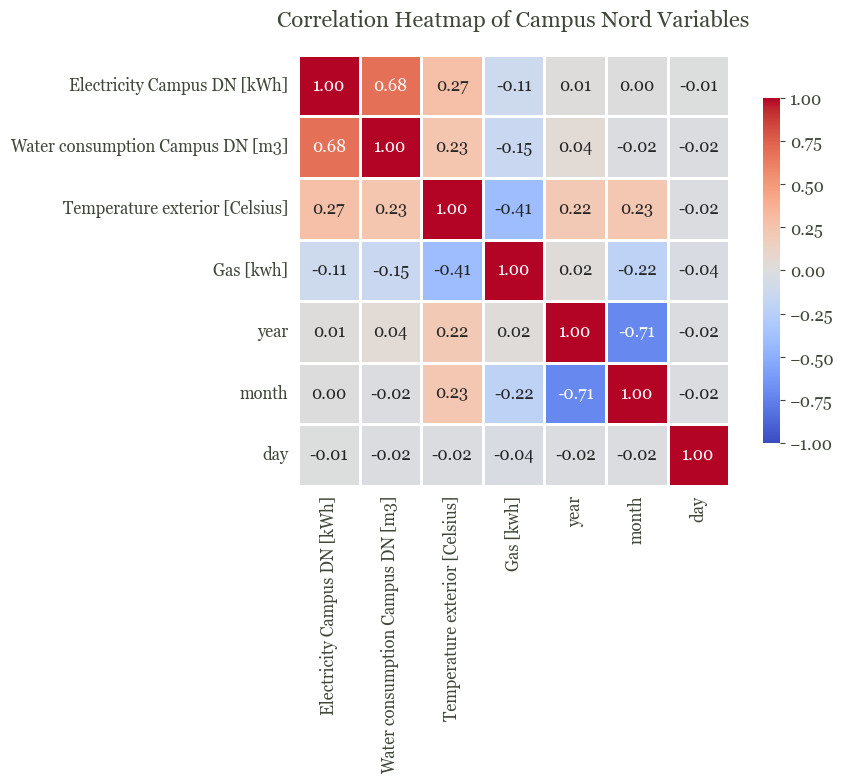


Strongest positive correlations:
Water consumption Campus DN [m3]  Electricity Campus DN [kWh]         0.681761
Temperature exterior [Celsius]    Electricity Campus DN [kWh]         0.274703
                                  Water consumption Campus DN [m3]    0.234934
month                             Temperature exterior [Celsius]      0.228212
year                              Temperature exterior [Celsius]      0.217073
dtype: float64

Strongest negative correlations:
Gas [kwh]  Electricity Campus DN [kWh]        -0.110605
           Water consumption Campus DN [m3]   -0.146711
month      Gas [kwh]                          -0.215885
Gas [kwh]  Temperature exterior [Celsius]     -0.406585
month      year                               -0.712388
dtype: float64


In [23]:
# 4.3 Heatmaps for correlations
import seaborn as sns

# Get measurement columns (exclude categorical and derived columns)
#numeric_cols = get_measurement_columns(data)
#print(numeric_cols)
# Calculate correlation matrix
corr_matrix = data.iloc[:,0:7].corr(method='pearson')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True,  # Make cells square-shaped
            linewidths=1,  # Add gridlines
            cbar_kws={"shrink": 0.8},  # Adjust colorbar size
            vmin=-1, vmax=1)  # Set scale from -1 to 1

plt.title('Correlation Heatmap of Campus Nord Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations (excluding diagonal)
print("\nStrongest positive correlations:")
# Get upper triangle of correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_pairs = corr_matrix.where(~mask).stack().sort_values(ascending=False)
print(corr_pairs.head(5))

print("\nStrongest negative correlations:")
print(corr_pairs.tail(5))

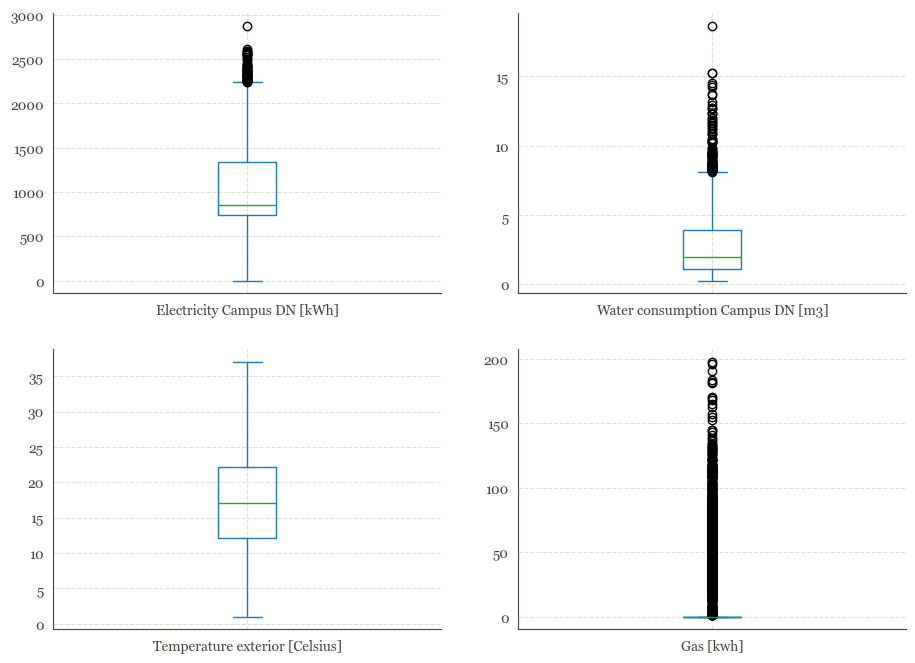

In [24]:
# 4.4 Boxplots for distributions
import math
def get_measurement_columns(df):
    return [c for c in df.select_dtypes("number").columns
            if c not in ["year", "month", "day", "hour"]]

meas_cols = get_measurement_columns(data)

n = len(meas_cols)
ncols = 2                     # or 3 if you prefer wider rows
nrows = math.ceil(n / ncols)

atributos_boxplot = data[meas_cols].plot(
    kind='box',
    subplots=True,
    layout=(nrows, ncols),
    figsize=(11, 4 * nrows),
    sharex=False,
    sharey=False,
    fontsize=10
)


Electricity Campus DN [kWh]: removed 64 outliers
Water consumption Campus DN [m3]: removed 118 outliers
Temperature exterior [Celsius]: removed 0 outliers
Gas [kwh]: removed 1383 outliers


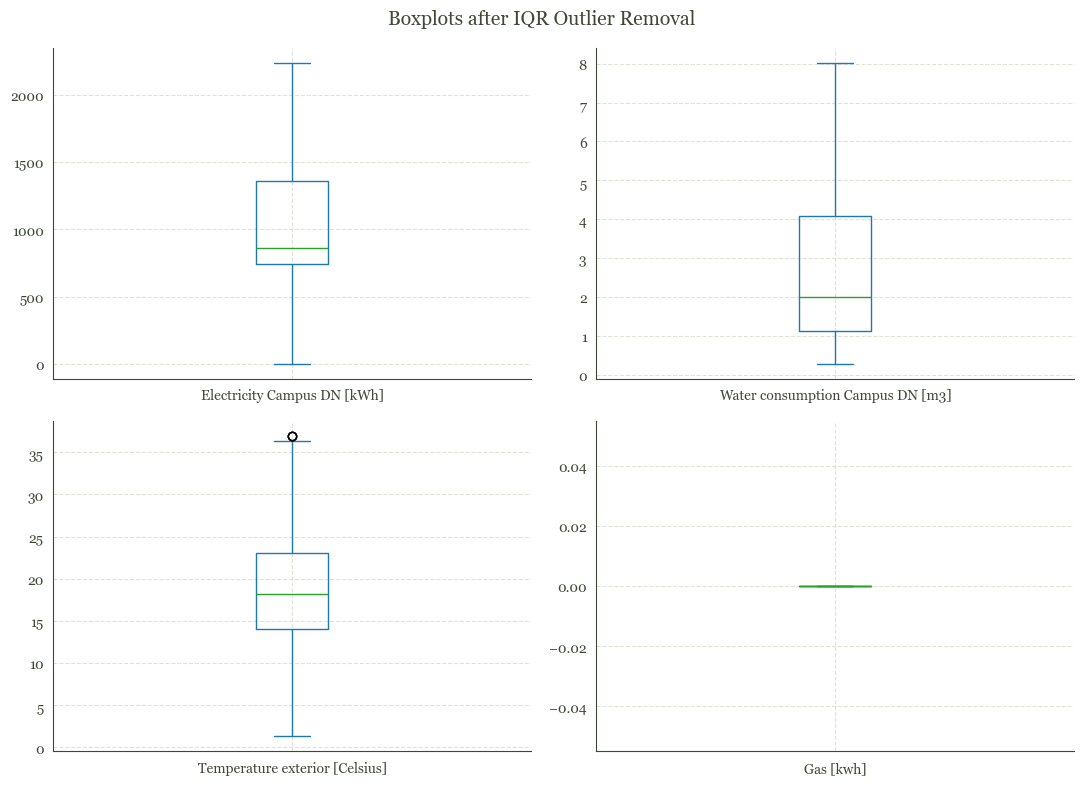

In [25]:
# 4.4 Boxplots for distributions(+IQR)

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# get column
def get_measurement_columns(df):
    return [c for c in df.select_dtypes("number").columns
            if c not in ["year", "month", "day", "hour"]]

data_clean = data.copy()

numeric_cols = get_measurement_columns(data_clean)

for col in numeric_cols:
    before = len(data_clean)
    data_clean = remove_outliers_iqr(data_clean, col)
    after = len(data_clean)
    print(f"{col}: removed {before - after} outliers")

# plot
n = len(numeric_cols)
ncols = 2
nrows = math.ceil(n / ncols)

# plot
ax = data_clean[numeric_cols].plot(
    kind='box',
    subplots=True,
    layout=(nrows, ncols),
    figsize=(11, 4 * nrows),
    sharex=False,
    sharey=False,
    fontsize=10,
    grid=True
)

plt.suptitle("Boxplots after IQR Outlier Removal", fontsize=14)
plt.tight_layout()
plt.show()

# Summarize key findings
Based on the exploratory data analysis of the Campus Diagonal Nord UPC dataset, the following key findings can be summarized:


1. **Data quality and preprocessing**


   **Completeness**


   The original dataset contains 9,793 hours of records and has no missing values, ensuring good data quality.


   **Outlier handling:**


   After applying the IQR method for outlier handling, 105 outliers were removed from power consumption, 625 from water consumption, and the highly sparse data of natural **gas consumption** (75% of the data points are 0)


2. **Consumption patterns of energy and water resources**


   **Strong periodicity**:Both Electricity Campus DN [kWh] and Water consumption Campus DN [m3] show obvious daily and weekly cycle patterns.


   **Daily distribution:**


   **Electricity consumption** peaks are concentrated during the day, especially between **8:00 and 15:00**.


   **Water consumption** also mainly occurs during the day, with two relatively obvious peaks at **7:00-9:00** (morning activity) and **14:00-15:00** (afternoon activity).


   **Weekly distribution:**


   Electricity and water consumption on **weekdays (Monday to Friday) is significantly higher** than that on weekends (Saturday and Sunday).


3. **The impact of temperature on Energy Consumption and seasonal analysis**


   **Natural Gas (Gas [kwh]) - Heating drive:**


   Natural gas consumption has a **moderate negative correlation** with the external Temperature (Temperature exterior [Celsius]) (with a correlation coefficient of -0.41).


   Seasonal distribution shows that natural gas consumption is mainly concentrated in **winter and spring**, and is almost zero in summer and autumn, which strongly confirms that natural gas is mainly used for heating purposes.


   **Electricity Campus DN [kWh] - Complex relationship:**


   Electricity consumption shows a **slight negative correlation** with the external temperature (with a correlation coefficient of -0.27).


   Seasonal distribution shows that electricity consumption is **the highest in spring and the lowest in summer**. This might imply: 1) The heating demand at lower temperatures (even if it is not gas heating) consumes more electricity; 2) Factors such as the summer vacation have led to a significant reduction in campus activities during summer. Even if there is a need for cooling, the total electricity consumption remains the lowest.


4. **Correlation among resources**


   **Electricity and water:**


   There is a **strong positive correlation** between the two (with a correlation coefficient of 0.68), indicating that when campus activities increase, the use of electricity and water usually increases simultaneously.


   **Electricity and natural gas:**


   There is a **slight negative correlation** between the two (with a correlation coefficient of -0.11), which may be due to the fact that when natural gas consumption is high (in cold weather), the overall activity level is slightly lower or the heating demand reduces the reliance on electricity, and vice versa.

# Takeaway:
1. **Main observation and reflection:**
   **Electricity and water consumption** are **significantly higher on weekdays** than on weekends.
    → This reflects the operational schedule of the campus: classrooms, offices, and facilities are active Monday–Friday, while activity drops sharply on weekends.


   **Hourly profiles** show clear daytime peaks:

   **Electricity and water usage** remain at a high level from 7 a.m. to 20 p.m., ** matching working and teaching hours.

   **Nighttime consumption** from 23 p.m. to 5 a.m. remains minimal across all resources. It conforms to a typical human activity pattern.

   **Gas consumption is zero** from 9:00 a.m. to 14 p.m..

   Reflection → Does **solar energy or heat pumps** provide the thermal load, or is there automatic control via Building Management System?


   **Gas usage** heating demand is weather-driven rather than schedule-driven by season and temperature, confirming the weather dependence.

   These patterns confirm a **strong behavioral link between energy/water demand and campus activity levels** rather than random fluctuation.

2. **Analytical takeaway:**

   1.Electricity-water consumption: Correlation coefficient 0.68 → obvious positive correlation. It indicates that when electricity usage rises, water consumption also tends to increase. This might reflect that when the overall activity level (such as laboratory operation, air conditioning, and equipment usage) increases, water and electricity grow together.

   2.Temperature - Gas: Correlation coefficient -0.41 → negative correlation. The lower the external temperature, the higher the gas consumption, which is intuitive (heating demand rises in winter).

   3.Temperature-electricity: Correlation coefficient 0.27 → weak positive correlation. When the temperature is high, the power supply increases slightly, possibly due to the rising demand for cooling (air conditioning).

   4.Electricity - Gas: Correlation coefficient -0.11 → Almost no significant relationship. There is no obvious complementary or substitutive relationship between the use of electricity and gas.

   5.Some of the anomalies would be the regular phenomena. such as the gas usage peaks starting from 18:00 in November. Weekdays likely have people, equipment and lighting adding heat; weekends don’t, so maintaining the same setpoints needs more boiler runtime.

   6.The IQR method sometimes is overly aggressive, resulting in almost all non-zero consumption values being marked as outliers and removed in gas consumption. This indicates that for highly sparse data, more customized outlier handling methods need to be adopted.

   7.Consumption drops on weekends, highlighting potential opportunities for scheduling-based efficiency measures (e.g., automated lighting/HVAC reduction during low-activity periods).
